importacao de biblioticas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px



Importacao e limpeza de dados

In [67]:

pla_fib_1 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_1.csv', encoding='ISO-8859-1', delimiter=';')    
pla_fib_2 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_2.csv', encoding='ISO-8859-1', delimiter=';') 
pla_fib_3 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_3.csv', encoding='ISO-8859-1', delimiter=';') 
pla_fib_4 = pd.read_csv('PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_4.csv', encoding='ISO-8859-1', delimiter=';') 

pla_norm_1 = pd.read_csv('PLA NORMAL/PLA NORMAL_1_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True)    
pla_norm_2 = pd.read_csv('PLA NORMAL/PLA NORMAL_2_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 
pla_norm_3 = pd.read_csv('PLA NORMAL/PLA NORMAL_3_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 
pla_norm_4 = pd.read_csv('PLA NORMAL/PLA NORMAL_4_1.csv', encoding='utf-8', delimiter=';', skip_blank_lines=True) 

pla_fibs = [pla_fib_1, pla_fib_2, pla_fib_3, pla_fib_4]
pla_norms = [pla_norm_1, pla_norm_2, pla_norm_3, pla_norm_4]

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned


for i in range(len(pla_fibs)):
    pla_fibs[i] = pla_fibs[i].drop(0)
    pla_fibs[i] = pla_fibs[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_fibs[i] = pla_fibs[i].astype(float)
    pla_fibs[i] = remove_outliers(pla_fibs[i])

for i in range(len(pla_norms)):
    pla_norms[i] = pla_norms[i].drop(0)
    pla_norms[i] = pla_norms[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_norms[i] = pla_norms[i].astype(float)
    pla_norms[i] = remove_outliers(pla_norms[i])





In [65]:
pla_norms[1].columns

Index(['Tempo', 'Deslocamento', 'Força', 'Deslocamento à tração',
       'Quantidade de PIP', 'Tenacidade', 'Tensão à tração',
       'Deformação à tração (Deslocamento)(s)', '(mm)', '(kN)', '(mm).1',
       'Unnamed: 11', '(N/tex)', '(MPa)', '(%)'],
      dtype='object')

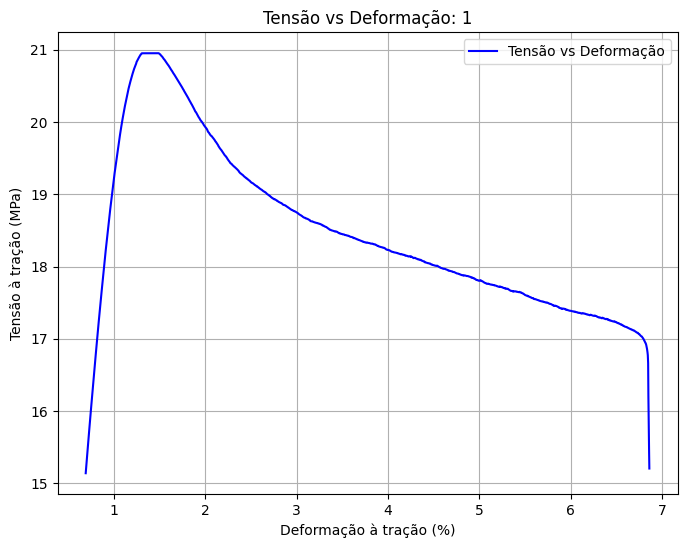

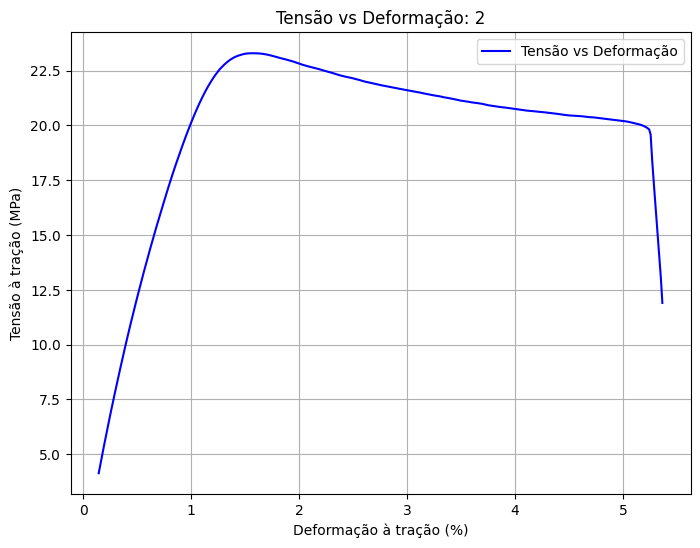

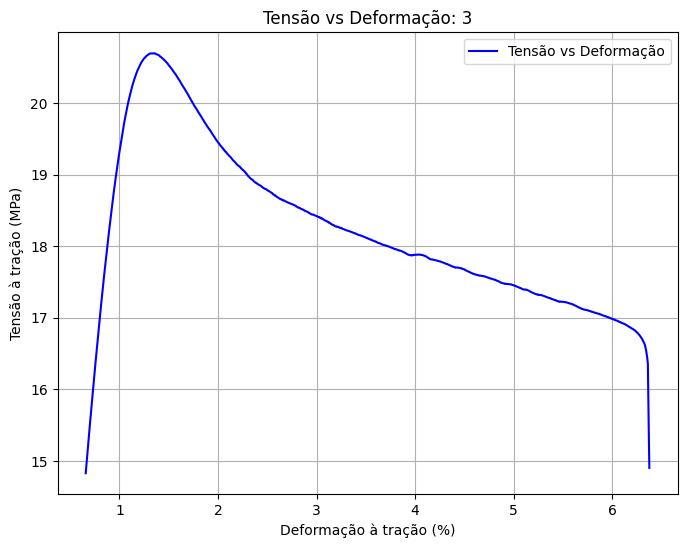

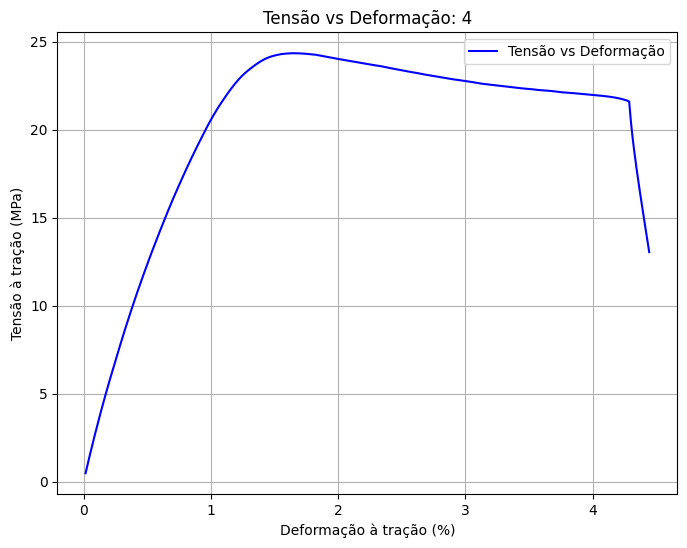

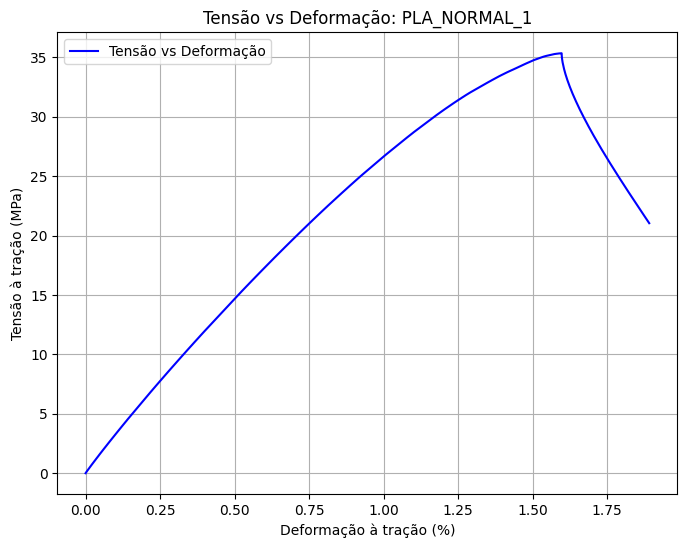

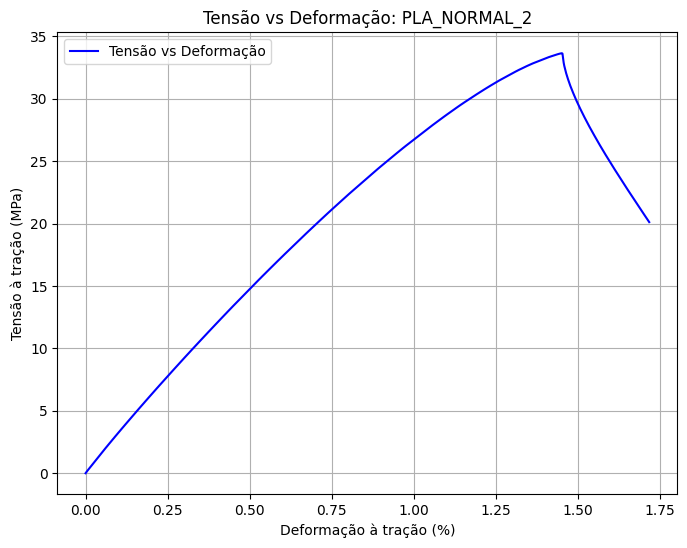

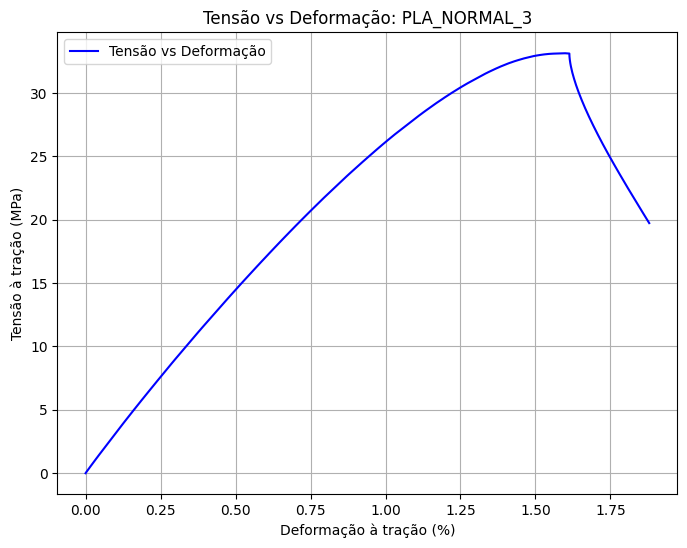

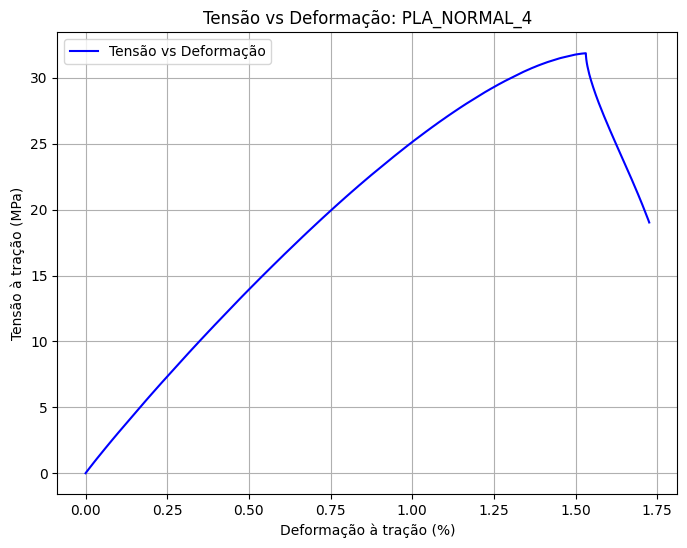

In [69]:
import matplotlib.pyplot as plt
for i in range(len(pla_fibs)):
    plt.figure(figsize=(8, 6))
    plt.plot(pla_fibs[i]['Deformação à tração (Deslocamento)'], pla_fibs[i]['Tensão à tração'], label='Tensão vs Deformação', color='b')

    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à tração (MPa)')
    plt.title(f'Tensão vs Deformação: {i + 1}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'PLA FIBRA DE CARBONO/PLA FIBRA DE CARBONO_{i + 1}.png')
    
for i in range(len(pla_norms)):
    plt.figure(figsize=(8, 6))
    plt.plot(pla_norms[i]['Deformação à tração (Deslocamento)'], pla_norms[i]['Tensão à tração'], label='Tensão vs Deformação', color='b')

    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à tração (MPa)')
    plt.title(f'Tensão vs Deformação: PLA_NORMAL_{i + 1}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'PLA NORMAL/PLA NORMAL_{i + 1}.png')